**Senior Project**
*   MBTI: Literati



In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
import io
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url = 'https://raw.githubusercontent.com/attirach/LITRATI/machine-learning-model/dataset/book_dataset.csv'
download = requests.get(url).content
train_df = pd.read_csv(io.StringIO(download.decode('utf-8')))
train_df = train_df.dropna()
train_df.head(10)

In [ ]:
df = pd.read_csv('book_dataset.csv', on_bad_lines = 'skip')
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
0,900000,Cabinet 03: Weather,Jeffrey Kastner,1932698019,4.00,2004,2,1,Cabinet,5:0,4:2,3:0,2:0,1:0,total:2,0,NaN,112,"Artwork by Joe Amrhein, Maria Blondeel, Spence...",0
1,900001,"Workouts in a Binder for Swimmers, Triathletes...",Nick Hansen,1931382743,4.48,2005,18,11,Velo Press,5:24,4:17,3:3,2:0,1:0,total:44,2,NaN,101,This waterproof book of 100 swimming workouts ...,2
2,900002,Las 120 jornadas de Sodoma,Marquis de Sade,8472233847,3.12,1992,1,3,TusQuets,5:1745,4:2246,3:2935,2:1753,1:1408,total:10087,9,NaN,424,The 120 Days of Sodom by Marquis de Sade relat...,9
3,900004,The Traveler: An American Odyssey in the Himal...,Eric Hansen,0871563509,4.18,1995,6,6,"Random House, Inc.",5:6,4:8,3:3,2:0,1:0,total:17,1,NaN,102,This loving memorial to Swift is a moving phot...,1
4,900006,Vertical Smile,Richard Condon,0297994026,3.74,1972,20,4,Littlehampton Book Services Ltd,5:7,4:17,3:13,2:2,1:0,total:39,1,NaN,334,NaN,1


In [ ]:
df.shape

(40890, 20)

In [ ]:
df['Name'][2932]

'The Saving Righteousness of God'

In [ ]:
df['Description'][2932]

'This book presents a series of studies on contentious aspects of Paul\'s doctrine of justification including the meaning of ""righteousness,"" the question of imputation, the role of resurrection in justification, an evaluation of the New Perspective, the soteriological and ecclesiological significance of justification, justification by faith with judgment according to works, and debates over the orthodoxy of N. T. Wright. The burden of this volume is to demonstrate that reformed and ""new"" readings of Paul are indispensable to attaining a full understanding of Paul\'s soteriology. An analysis of Galatians and Romans demonstrates that the covenantal and forensic dimensions of justification go hand in glove. The vertical and horizontal aspects need to be appropriately described and weighted in order to provide a holistic rendering of justification in Paul\'s letters. According to Paul, faith alone in Jesus Christ is the instrument of eschatological vindication; and faith alone marks o

In [ ]:
data_url = []
for i in df['ISBN']:
  url = 'https://covers.openlibrary.org/b/isbn/{}-L.jpg'.format(i)
  data_url.append(url)
df['url'] = data_url
df

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,url
0,900000,Cabinet 03: Weather,Jeffrey Kastner,1932698019,4.00,2004,2,1,Cabinet,5:0,...,3:0,2:0,1:0,total:2,0,NaN,112,"Artwork by Joe Amrhein, Maria Blondeel, Spence...",0,https://covers.openlibrary.org/b/isbn/19326980...
1,900001,"Workouts in a Binder for Swimmers, Triathletes...",Nick Hansen,1931382743,4.48,2005,18,11,Velo Press,5:24,...,3:3,2:0,1:0,total:44,2,NaN,101,This waterproof book of 100 swimming workouts ...,2,https://covers.openlibrary.org/b/isbn/19313827...
2,900002,Las 120 jornadas de Sodoma,Marquis de Sade,8472233847,3.12,1992,1,3,TusQuets,5:1745,...,3:2935,2:1753,1:1408,total:10087,9,NaN,424,The 120 Days of Sodom by Marquis de Sade relat...,9,https://covers.openlibrary.org/b/isbn/84722338...
3,900004,The Traveler: An American Odyssey in the Himal...,Eric Hansen,0871563509,4.18,1995,6,6,"Random House, Inc.",5:6,...,3:3,2:0,1:0,total:17,1,NaN,102,This loving memorial to Swift is a moving phot...,1,https://covers.openlibrary.org/b/isbn/08715635...
4,900006,Vertical Smile,Richard Condon,0297994026,3.74,1972,20,4,Littlehampton Book Services Ltd,5:7,...,3:13,2:2,1:0,total:39,1,NaN,334,NaN,1,https://covers.openlibrary.org/b/isbn/02979940...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,999991,Gendered Talk at Work: Constructing Gender Ide...,Janet Holmes,1405117591,4.28,2006,21,7,Wiley-Blackwell,5:15,...,3:6,2:1,1:0,total:25,0,NaN,251,<i>Gendered Talk at Work</i> examines how wome...,0,https://covers.openlibrary.org/b/isbn/14051175...
40886,999992,Good Will Toward Men: Women Talk Candidly abou...,Jack Kammer,0312104715,0.00,1994,1,2,St. Martin's Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,231,In interviews with gender issues journalist Ja...,0,https://covers.openlibrary.org/b/isbn/03121047...
40887,999993,Would You Rather . . . ?: The Outrageous Book ...,Randy Horn,0761124209,3.81,2001,1,10,Workman Publishing Company,5:39,...,3:34,2:11,1:2,total:121,14,NaN,400,<i>Would You Rather...?</i> takes the idea of ...,14,https://covers.openlibrary.org/b/isbn/07611242...
40888,999997,Addictions Treatment for Older Adults: Evaluat...,Kathryn Graham,1560248572,0.00,1995,2,2,Routledge,5:0,...,3:0,2:0,1:0,total:0,0,NaN,258,Here is a detailed description of an innovativ...,0,https://covers.openlibrary.org/b/isbn/15602485...


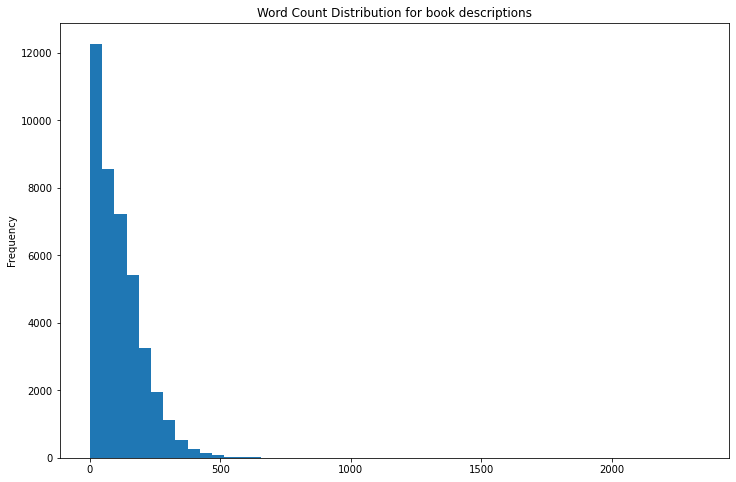

In [ ]:
# Calculating the word count for book description
df2 = df
df['word_count'] = df2['Description'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [ ]:
df = df[df['Description'].notna()]
df.shape

(35853, 22)

In [ ]:
df

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,url,word_count
0,900000,Cabinet 03: Weather,Jeffrey Kastner,1932698019,4.00,2004,2,1,Cabinet,5:0,...,2:0,1:0,total:2,0,NaN,112,"Artwork by Joe Amrhein, Maria Blondeel, Spence...",0,https://covers.openlibrary.org/b/isbn/19326980...,32
1,900001,"Workouts in a Binder for Swimmers, Triathletes...",Nick Hansen,1931382743,4.48,2005,18,11,Velo Press,5:24,...,2:0,1:0,total:44,2,NaN,101,This waterproof book of 100 swimming workouts ...,2,https://covers.openlibrary.org/b/isbn/19313827...,130
2,900002,Las 120 jornadas de Sodoma,Marquis de Sade,8472233847,3.12,1992,1,3,TusQuets,5:1745,...,2:1753,1:1408,total:10087,9,NaN,424,The 120 Days of Sodom by Marquis de Sade relat...,9,https://covers.openlibrary.org/b/isbn/84722338...,76
3,900004,The Traveler: An American Odyssey in the Himal...,Eric Hansen,0871563509,4.18,1995,6,6,"Random House, Inc.",5:6,...,2:0,1:0,total:17,1,NaN,102,This loving memorial to Swift is a moving phot...,1,https://covers.openlibrary.org/b/isbn/08715635...,50
5,900009,The Best Laid Plans,Sidney Sheldon,0006510558,3.69,1998,1,5,HarperCollins Publishers,5:4797,...,2:1769,1:366,total:21605,28,eng,344,"""The Best Laid Plans"" tells the explosive stor...",28,https://covers.openlibrary.org/b/isbn/00065105...,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40884,999990,School Talk: Gender and Adolescent Culture,Donna Eder,0813521793,3.57,1995,1,6,Rutgers University Press,5:2,...,2:1,1:0,total:23,3,NaN,209,Donna Eder is Professor of Sociology at Indian...,3,https://covers.openlibrary.org/b/isbn/08135217...,284
40885,999991,Gendered Talk at Work: Constructing Gender Ide...,Janet Holmes,1405117591,4.28,2006,21,7,Wiley-Blackwell,5:15,...,2:1,1:0,total:25,0,NaN,251,<i>Gendered Talk at Work</i> examines how wome...,0,https://covers.openlibrary.org/b/isbn/14051175...,115
40886,999992,Good Will Toward Men: Women Talk Candidly abou...,Jack Kammer,0312104715,0.00,1994,1,2,St. Martin's Press,5:0,...,2:0,1:0,total:0,0,NaN,231,In interviews with gender issues journalist Ja...,0,https://covers.openlibrary.org/b/isbn/03121047...,33
40887,999993,Would You Rather . . . ?: The Outrageous Book ...,Randy Horn,0761124209,3.81,2001,1,10,Workman Publishing Company,5:39,...,2:11,1:2,total:121,14,NaN,400,<i>Would You Rather...?</i> takes the idea of ...,14,https://covers.openlibrary.org/b/isbn/07611242...,249


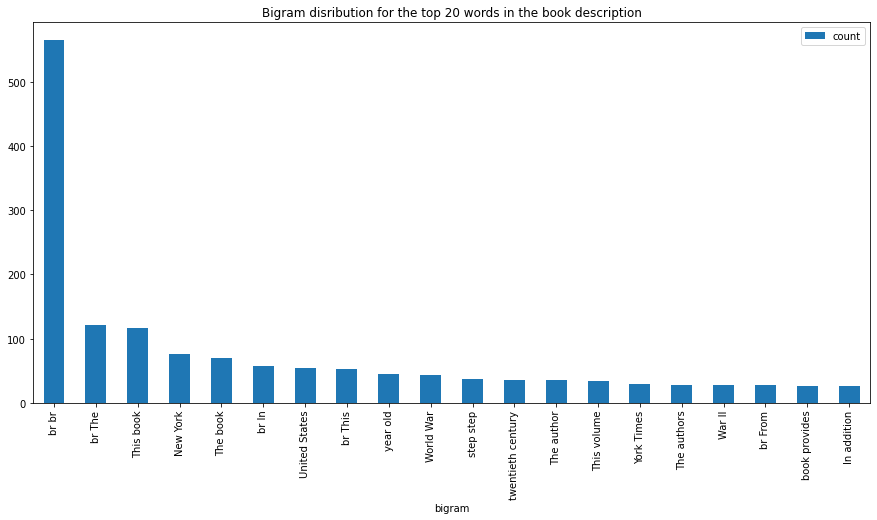

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Description'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [ ]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Description'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_html)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
df.shape

(35853, 23)

In [ ]:
df2 = df
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, year):
    
    # Matching the genre with the dataset and reset the index
    data = df2.loc[df2['PublishYear'] == year]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['Name'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Name'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:26]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['Name', 'url']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

In [ ]:
recommend('Traveler', 1998)

KeyError: ignored

In [ ]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, year):
    global rec
    # Matching the genre with the dataset and reset the index
    data = df2.loc[df2['PublishYear'] == year]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['Name'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['Name', 'url']].iloc[movie_indices]
    
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

In [ ]:
recommend('Las 120 jornadas de Sodoma', 1998)

KeyError: ignored